In [56]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns


In [57]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

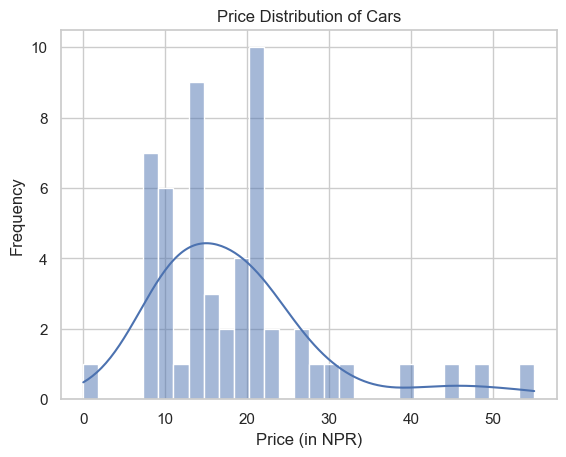

In [58]:
# price distribution
df = pd.read_csv('CarData.csv')
df['price']=df['price']/100000
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution of Cars')
plt.xlabel('Price (in NPR)')
plt.ylabel('Frequency')
plt.show()

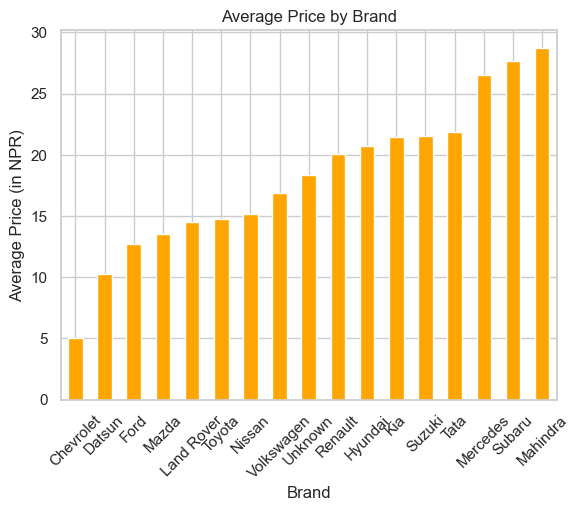

In [59]:
# 2. Average Price by Brand

avg_price_brand = df.groupby('brand')['price'].mean().sort_values()
avg_price_brand.plot(kind='bar', color='orange')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price (in NPR)')
plt.xticks(rotation=45)
plt.show()


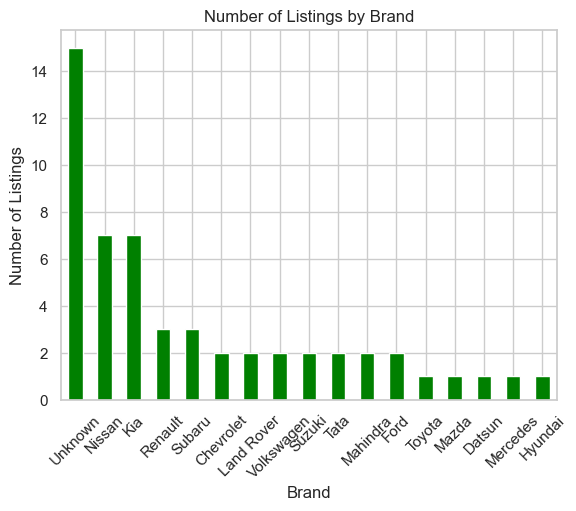

In [60]:
# 3. Number of Listings by Brand (Brand Popularity)

brand_counts = df['brand'].value_counts()
brand_counts.plot(kind='bar', color='green')
plt.title('Number of Listings by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19056\448839374.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.values, y=location_counts.index, palette='magma')


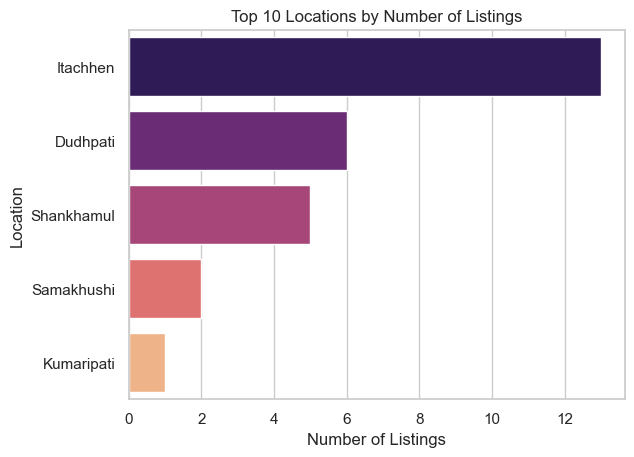

In [61]:
# 4. Listings by Location (Top 10 locations)

location_counts = df['area'].value_counts().head(5)
sns.barplot(x=location_counts.values, y=location_counts.index, palette='magma')
plt.title('Top 10 Locations by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Location')
plt.show()

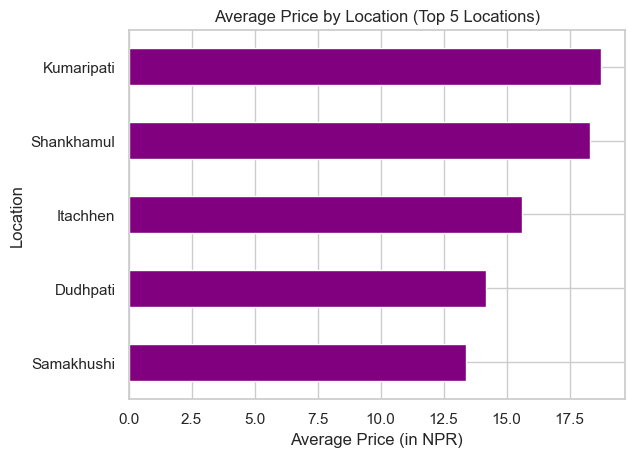

In [62]:
# 5. Average Price by Location (Top 10 locations with most listings)
top_locations = location_counts.index

avg_price_location = df[df['area'].isin(top_locations)].groupby('area')['price'].mean().sort_values()
avg_price_location.plot(kind='barh', color='purple')
plt.title('Average Price by Location (Top 5 Locations)')
plt.xlabel('Average Price (in NPR)')
plt.ylabel('Location')
plt.show()

In [63]:
df['condition'].value_counts()


condition
Like New     37
Used         10
Brand New     7
Name: count, dtype: int64

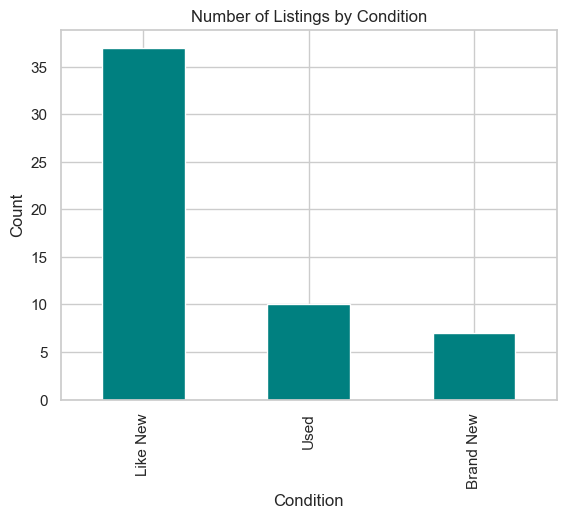

In [64]:
# 6. Condition Breakdown

condition_counts = df['condition'].value_counts()
condition_counts.plot(kind='bar', color='teal')
plt.title('Number of Listings by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

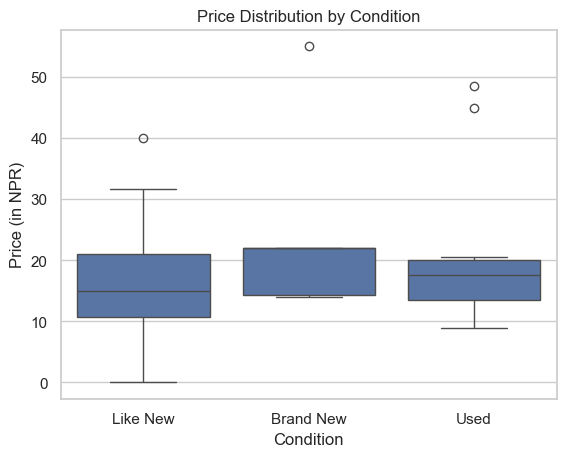

In [65]:
# 7. Price by Condition (Boxplot)

sns.boxplot(x='condition', y='price', data=df)
plt.title('Price Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Price (in NPR)')
plt.show()

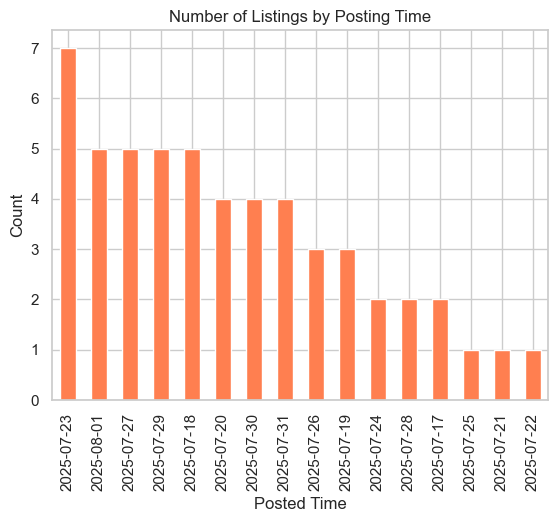

In [66]:
# 8. Posting Time Breakdown (Count by posted time category)

posted_counts = df['posted_date'].value_counts()
posted_counts.plot(kind='bar', color='coral')
plt.title('Number of Listings by Posting Time')
plt.xlabel('Posted Time')
plt.ylabel('Count')
plt.show()

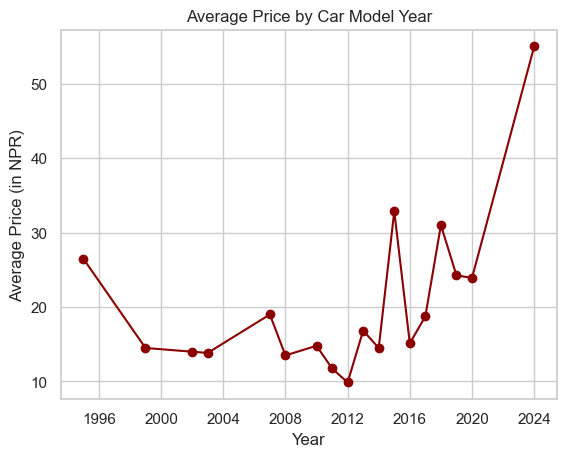

In [67]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df['year'] = df['year'].astype(int)
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # convert price to numeric if not already

avg_price_year = df.groupby('year')['price'].mean().sort_index()
avg_price_year.index = avg_price_year.index.astype(int)

# Plotting
fig, ax = plt.subplots()
avg_price_year.plot(kind='line', marker='o', color='darkred', ax=ax)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # force integer x-axis ticks
plt.title('Average Price by Car Model Year')
plt.xlabel('Year')
plt.ylabel('Average Price (in NPR)')
plt.grid(True)
plt.show()



In [68]:
used_df = df[df['condition'] == 'Used']

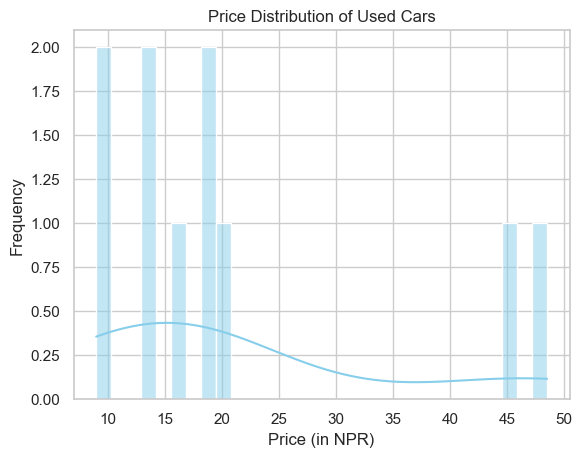

In [69]:
sns.histplot(used_df['price'], bins=30, kde=True, color='skyblue')
plt.title('Price Distribution of Used Cars')
plt.xlabel('Price (in NPR)')
plt.ylabel('Frequency')
plt.show()


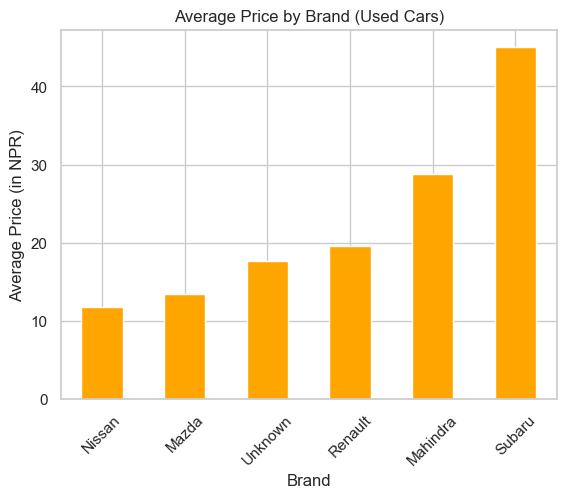

In [70]:
avg_price_brand = used_df.groupby('brand')['price'].mean().sort_values()
avg_price_brand.plot(kind='bar', color='orange')
plt.title('Average Price by Brand (Used Cars)')
plt.xlabel('Brand')
plt.ylabel('Average Price (in NPR)')
plt.xticks(rotation=45)
plt.show()


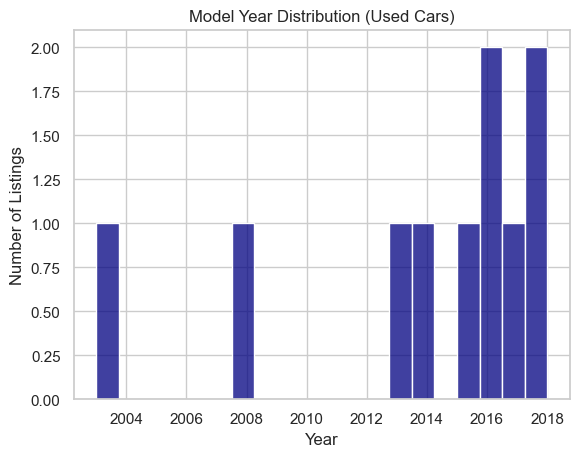

In [71]:
sns.histplot(used_df['year'].dropna().astype(int), bins=20, color='navy')
plt.title('Model Year Distribution (Used Cars)')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.show()


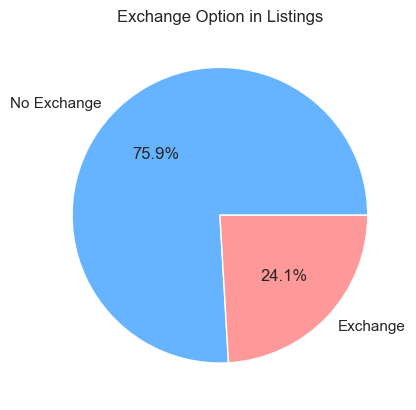

In [72]:
province_counts = df['province'].value_counts()


exchange_counts = df['exchange_option'].value_counts()

plt.pie(exchange_counts, labels=exchange_counts.index.map({True: 'Exchange', False: 'No Exchange'}),
        autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Exchange Option in Listings')
plt.show()


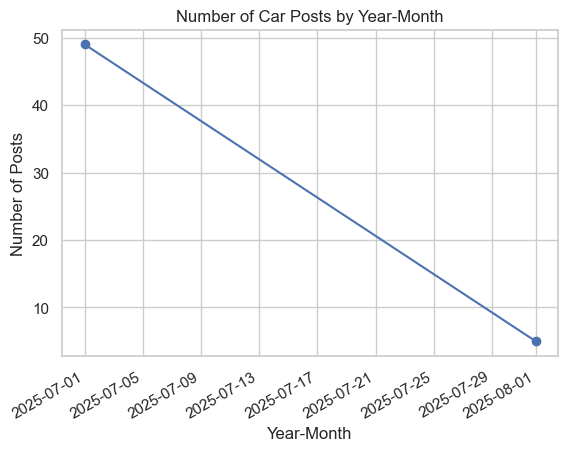

In [77]:
df['posted_date'] = pd.to_datetime(df['posted_date'], errors='coerce')

# Now you can extract year-month period:
df['year_month'] = df['posted_date'].dt.to_period('M')

posts_per_month = df.groupby('year_month').size()
posts_per_month.index = posts_per_month.index.to_timestamp()

posts_per_month.plot(marker='o')
plt.title('Number of Car Posts by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()




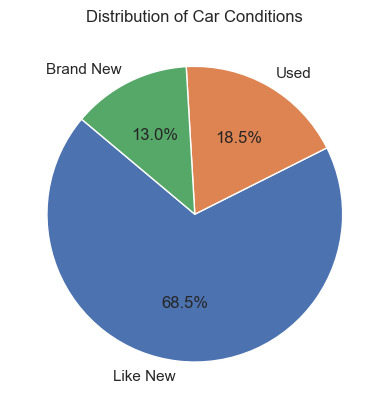

In [74]:
condition_counts = df['condition'].value_counts()


plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Car Conditions')
plt.show()


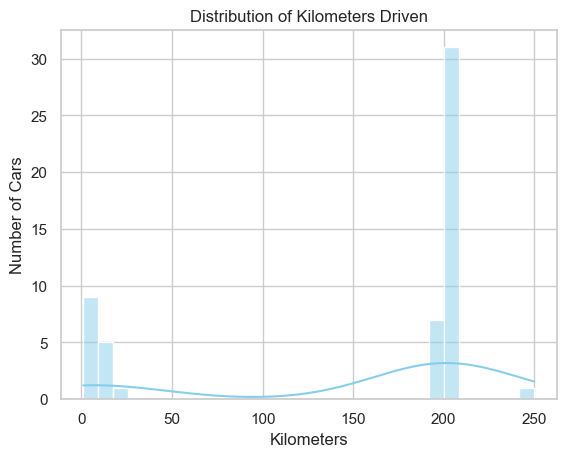

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['kilometers'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers')
plt.ylabel('Number of Cars')
plt.show()
